In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [ ]:
ds = xr.open_dataset(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\raw\temperature\gistemp250_GHCNv4.nc")
temp = ds['tempanomaly']

In [ ]:
temp_2020 = temp.sel(time="2020-07-15", method="nearest")
temp_2020


<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)> Size: 65kB
[16200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    time     datetime64[ns] 8B 2020-07-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

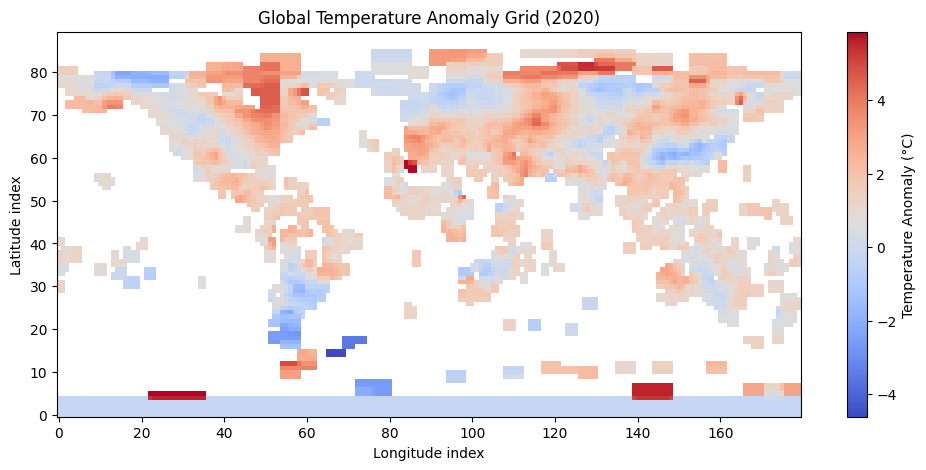

In [ ]:
plt.figure(figsize=(12, 5))
plt.imshow(
    temp_2020,
    origin="lower",
    aspect="auto",
    cmap="coolwarm"
)
plt.colorbar(label="Temperature Anomaly (°C)")
plt.title("Global Temperature Anomaly Grid (2020)")
plt.xlabel("Longitude index")
plt.ylabel("Latitude index")
plt.show()


In [ ]:
df_2020 = temp_2020.to_dataframe(name="temp_anomaly").reset_index()
df_2020.head()

,lat,lon,time,temp_anomaly
0,-89.0,-179.0,2020-07-15,-0.24
1,-89.0,-177.0,2020-07-15,-0.24
2,-89.0,-175.0,2020-07-15,-0.24
3,-89.0,-173.0,2020-07-15,-0.24
4,-89.0,-171.0,2020-07-15,-0.24


In [ ]:
df_2020

,lat,lon,time,temp_anomaly
0,-89.0,-179.0,2020-07-15,-0.24
1,-89.0,-177.0,2020-07-15,-0.24
2,-89.0,-175.0,2020-07-15,-0.24
3,-89.0,-173.0,2020-07-15,-0.24
4,-89.0,-171.0,2020-07-15,-0.24
...,...,...,...,...
16195,89.0,171.0,2020-07-15,NaN
16196,89.0,173.0,2020-07-15,NaN
16197,89.0,175.0,2020-07-15,NaN
16198,89.0,177.0,2020-07-15,NaN


In [ ]:
ds

<xarray.Dataset> Size: 114MB
Dimensions:      (lat: 90, lon: 180, time: 1752, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-12-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 114MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2026-01-12 12:04:17 by SBBX_to_nc 2.0 - ILAND=250, ...

In [ ]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\processed\temperature_zonal_annual.csv")

In [ ]:
df['latitude_band'].unique()

array(['90S_64S', '64S_44S', '44S_24S', '24S_EQU', 'EQU_24N', '24N_44N',
       '44N_64N', '64N_90N'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24668\2542166449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["rolling"] = subset["temp_anomaly"].rolling(10).mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_24668\2542166449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["rolling"] = subset["temp_anomaly"].rolling(10).mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_24668\2542166449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

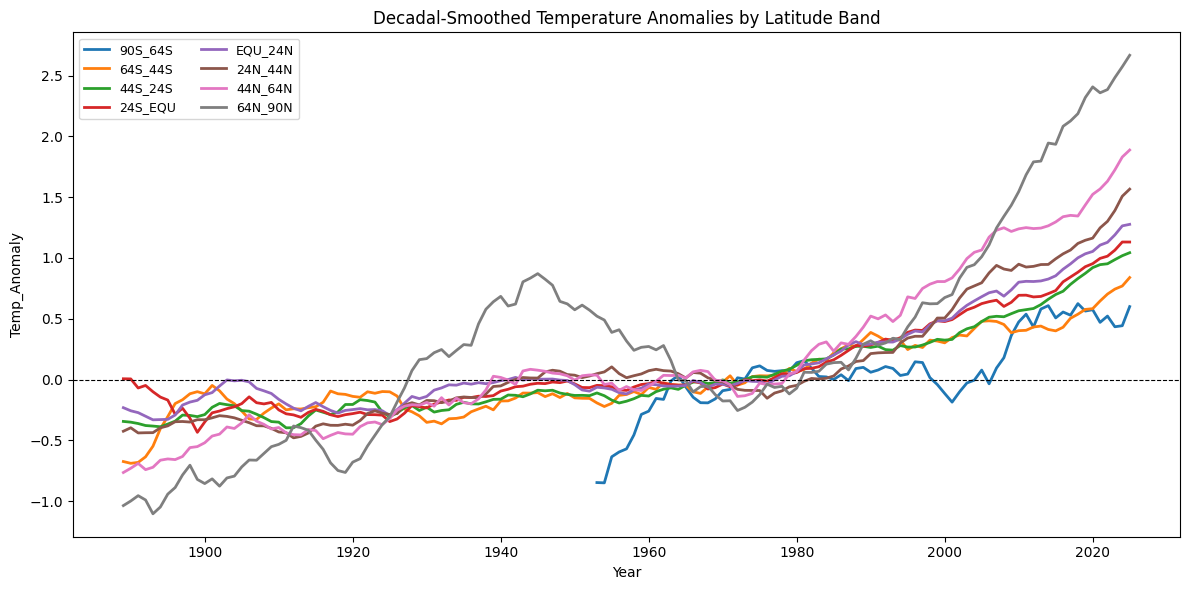

In [ ]:
plt.figure(figsize=(12,6))

for band in df['latitude_band'].unique():
    subset = df[df['latitude_band']==band]
    subset["rolling"] = subset["temp_anomaly"].rolling(10).mean()

    plt.plot(subset['year'], subset['rolling'], label=band, linewidth=2)

plt.title("Decadal-Smoothed Temperature Anomalies by Latitude Band")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Temp_Anomaly")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()


#warnings.filterwarnings(all)

In [ ]:
subset

,year,temp_anomaly,latitude_band,rolling
1022,1880,-0.841699,64N_90N,NaN
1023,1881,-1.393695,64N_90N,NaN
1024,1882,-1.157140,64N_90N,NaN
1025,1883,0.066646,64N_90N,NaN
1026,1884,-0.881021,64N_90N,NaN
...,...,...,...,...
1163,2021,1.960902,64N_90N,2.357946
1164,2022,2.509742,64N_90N,2.384483
1165,2023,2.551000,64N_90N,2.483111
1166,2024,2.898653,64N_90N,2.572245


In [ ]:
variance_df = df.groupby('latitude_band')['temp_anomaly'].var().sort_values(ascending=False)

In [ ]:
variance_df

latitude_band
64N_90N    1.186733
44N_64N    0.625045
90S_64S    0.438348
24N_44N    0.348022
EQU_24N    0.225139
24S_EQU    0.218711
64S_44S    0.191866
44S_24S    0.189730
Name: temp_anomaly, dtype: float64

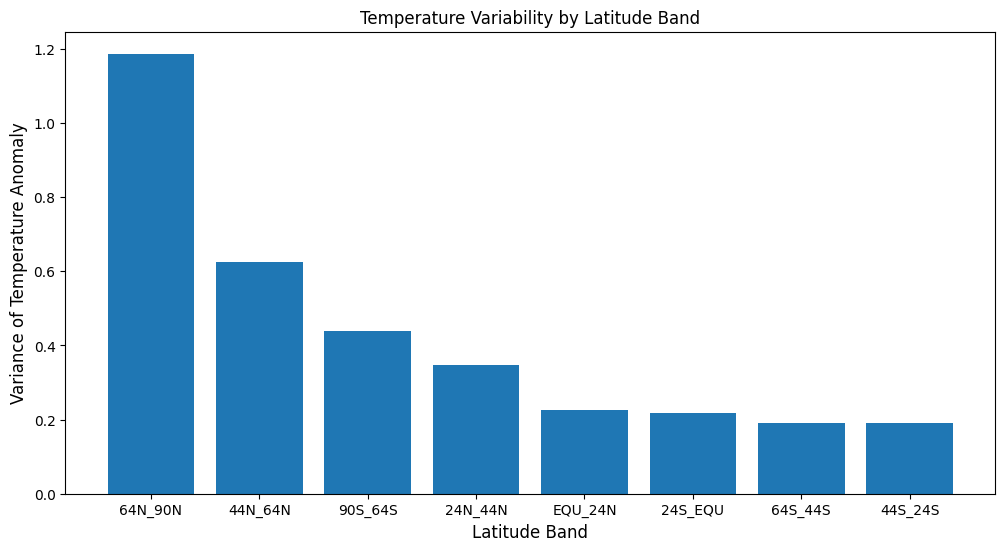

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(variance_df.index, variance_df.values)
plt.ylabel("Variance of Temperature Anomaly", fontsize=12)
plt.xlabel("Latitude Band", fontsize=12)
plt.title("Temperature Variability by Latitude Band")
plt.show()

## CONFLICTS DATASET


In [ ]:
df_conflicts = pd.read_csv(r'C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\raw\conflicts\organizedviolencecy_v25_1.csv')
df_conflicts.head()

,country_id_cy,country_cy,year_cy,region_cy,main_govt_name_cy,sb_exist_cy,sb_dyad_count_cy,sb_dyad_ids_cy,sb_dyad_names_cy,sb_deaths_parties_cy,...,os_total_deaths_best_cy,os_total_deaths_high_cy,os_total_deaths_low_cy,cumulative_total_deaths_parties_in_orgvio_cy,cumulative_total_deaths_civilians_in_orgvio_cy,cumulative_total_deaths_unknown_in_orgvio_cy,cumulative_total_deaths_in_orgvio_best_cy,cumulative_total_deaths_in_orgvio_high_cy,cumulative_total_deaths_in_orgvio_low_cy,version
0,700,Afghanistan,1989,Asia,Government of Afghanistan,1,5,724; 726; 727; 729; 732,Government of Afghanistan - Hizb-i Islami-yi A...,1019,...,0,0,0,1065,303,4043,5411,17642,2141,25.1
1,700,Afghanistan,1990,Asia,Government of Afghanistan,1,5,724; 726; 727; 732; 733,Government of Afghanistan - Hizb-i Islami-yi A...,704,...,0,0,0,724,101,689,1514,2311,1359,25.1
2,700,Afghanistan,1991,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,2274,...,0,0,0,2274,49,1230,3553,4053,3407,25.1
3,700,Afghanistan,1992,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,187,...,8,304,8,187,1695,2503,4385,5865,4368,25.1
4,700,Afghanistan,1993,Asia,Government of Afghanistan,1,4,726; 732; 734; 842,Government of Afghanistan - Hizb-i Islami-yi A...,554,...,26,240,26,556,637,2912,4105,8433,4097,25.1


In [ ]:
conflict = df_conflicts[["country_cy", "year_cy", "sb_exist_cy", "sb_total_deaths_best_cy"]].copy()

conflict.columns = ['country', 'year', 'conflict_present', 'deaths']

In [ ]:
conflict

,country,year,conflict_present,deaths
0,Afghanistan,1989,1,5174
1,Afghanistan,1990,1,1478
2,Afghanistan,1991,1,3302
3,Afghanistan,1992,1,4287
4,Afghanistan,1993,1,4071
...,...,...,...,...
6931,Zimbabwe (Rhodesia),2020,0,0
6932,Zimbabwe (Rhodesia),2021,0,0
6933,Zimbabwe (Rhodesia),2022,0,0
6934,Zimbabwe (Rhodesia),2023,0,0


In [ ]:
conflict.to_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\processed\conflict_country_year_clean.csv", index=False)

## GEO-JSON - To calculate centroids

In [ ]:
import geopandas as gpd

In [ ]:
gpd.show_versions()


SYSTEM INFO
-----------
python     : 3.10.19 | packaged by conda-forge | (main, Jan 26 2026, 23:39:36) [MSC v.1944 64 bit (AMD64)]
executable : c:\Users\Admin\anaconda3\envs\climate_conflict_env\python.exe
machine    : Windows-10-10.0.26200-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.13.1
GEOS lib   : None
GDAL       : 3.11.4
GDAL data dir: c:\Users\Admin\anaconda3\envs\climate_conflict_env\lib\site-packages\pyogrio\gdal_data\
PROJ       : 9.5.1
PROJ data dir: c:\Users\Admin\anaconda3\envs\climate_conflict_env\lib\site-packages\pyproj\proj_dir\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 1.1.2
numpy      : 2.2.6
pandas     : 2.3.3
pyproj     : 3.7.1
shapely    : 2.1.2
pyogrio    : 0.12.1
geoalchemy2: None
geopy      : None
matplotlib : 3.10.8
mapclassify: None
fiona      : None
psycopg    : None
psycopg2   : None
pyarrow    : None


In [ ]:
gdf = gpd.read_file(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\raw\metadata\ne_10m_admin_0_countries.geojson")


In [ ]:
gdf.shape

(258, 162)

In [ ]:
#for cols in cols_gdf:
 #   print(cols)

In [ ]:
gdf[gdf["NAME"] == "Afghanistan"]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FC_TR,FC_ID,FC_PL,FC_GR,FC_IT,FC_NL,FC_SE,FC_BD,FC_UA,geometry
129,Admin-0 country,0,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,None,None,None,None,None,None,None,None,None,"POLYGON ((74.54235 37.02167, 74.54742 37.01568..."


In [ ]:
gdf["ADMIN"] == "Afghanistan"

0      False
1      False
2      False
3      False
4      False
       ...  
253    False
254    False
255    False
256    False
257    False
Name: ADMIN, Length: 258, dtype: bool

In [ ]:
gdf[gdf["ADMIN"].str.contains("afghan", case=False, na=False)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FC_TR,FC_ID,FC_PL,FC_GR,FC_IT,FC_NL,FC_SE,FC_BD,FC_UA,geometry
129,Admin-0 country,0,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,None,None,None,None,None,None,None,None,None,"POLYGON ((74.54235 37.02167, 74.54742 37.01568..."


In [ ]:
afg_dict = gdf.loc[gdf["ADMIN"].str.contains("afgh", case=False)].iloc[0].to_dict()

In [ ]:
for k, v in afg_dict.items():
    print(f"{k} : {v}")


## There's one column i.e. geometry which is of our use, nothing else

featurecla : Admin-0 country
scalerank : 0
LABELRANK : 3
SOVEREIGNT : Afghanistan
SOV_A3 : AFG
ADM0_DIF : 0
LEVEL : 2
TYPE : Sovereign country
ADMIN : Afghanistan
ADM0_A3 : AFG
GEOU_DIF : 0
GEOUNIT : Afghanistan
GU_A3 : AFG
SU_DIF : 0
SUBUNIT : Afghanistan
SU_A3 : AFG
BRK_DIFF : 0
NAME : Afghanistan
NAME_LONG : Afghanistan
BRK_A3 : AFG
BRK_NAME : Afghanistan
BRK_GROUP : None
ABBREV : Afg.
POSTAL : AF
FORMAL_EN : Islamic State of Afghanistan
FORMAL_FR : None
NAME_CIAWF : Afghanistan
NOTE_ADM0 : None
NOTE_BRK : None
NAME_SORT : Afghanistan
NAME_ALT : None
MAPCOLOR7 : 5
MAPCOLOR8 : 6
MAPCOLOR9 : 8
MAPCOLOR13 : 7
POP_EST : 34124811
POP_RANK : 15
GDP_MD_EST : 64080.0
POP_YEAR : 2017
LASTCENSUS : 1979
GDP_YEAR : 2016
ECONOMY : 7. Least developed region
INCOME_GRP : 5. Low income
WIKIPEDIA : -99
FIPS_10_ : AF
ISO_A2 : AF
ISO_A2_EH : AF
ISO_A3 : AFG
ISO_A3_EH : AFG
ISO_N3 : 004
ISO_N3_EH : 004
UN_A3 : 004
WB_A2 : AF
WB_A3 : AFG
WOE_ID : 23424739
N_ : 23424739
WOE_NOTE : Exact WOE match as coun

In [ ]:
gdf["country"] = gdf["NAME"]

In [ ]:
gdf1 = gdf.copy()

In [ ]:
cols_to_keep = ["ADMIN", "NAME", "geometry"]
gdf_filtered = gdf[[c for c in gdf.columns if c in cols_to_keep]]

In [ ]:
gdf_filtered

,ADMIN,NAME,geometry
0,Indonesia,Indonesia,"MULTIPOLYGON (((117.70361 4.16342, 117.70361 4..."
1,Malaysia,Malaysia,"MULTIPOLYGON (((117.70361 4.16342, 117.69711 4..."
2,Chile,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...
253,Macao S.A.R,Macao,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
254,Ashmore and Cartier Islands,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Bajo Nuevo Bank (Petrel Is.),Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Serranilla Bank,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [ ]:
gdf_filtered["latitude"] = gdf_filtered.geometry.centroid.y
gdf_filtered["longitude"] = gdf_filtered.geometry.centroid.x

C:\Users\Admin\AppData\Local\Temp\ipykernel_24668\2908946288.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_filtered["latitude"] = gdf_filtered.geometry.centroid.y
c:\Users\Admin\anaconda3\envs\climate_conflict_env\lib\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24668\2908946288.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_filte

In [ ]:
gdf_filtered

,ADMIN,NAME,geometry,latitude,longitude
0,Indonesia,Indonesia,"MULTIPOLYGON (((117.70361 4.16342, 117.70361 4...",-2.222961,117.270434
1,Malaysia,Malaysia,"MULTIPOLYGON (((117.70361 4.16342, 117.69711 4...",3.792393,109.698868
2,Chile,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",-37.743605,-71.364374
3,Bolivia,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",-16.706877,-64.684754
4,Peru,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",-9.154388,-74.378065
...,...,...,...,...,...
253,Macao S.A.R,Macao,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...",22.157785,113.550197
254,Ashmore and Cartier Islands,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",-12.432577,123.586368
255,Bajo Nuevo Bank (Petrel Is.),Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",15.795010,-79.987866
256,Serranilla Bank,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",15.864461,-78.638119


In [ ]:
## Since centroids look different or incorrect, we'll go with representative points

gdf_filtered["rep_point"] = gdf_filtered.geometry.representative_point()
gdf_filtered["latitude"] = gdf_filtered["rep_point"].y
gdf_filtered["longitude"] = gdf_filtered["rep_point"].x


c:\Users\Admin\anaconda3\envs\climate_conflict_env\lib\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gdf_filtered

,ADMIN,NAME,geometry,latitude,longitude,rep_point
0,Indonesia,Indonesia,"MULTIPOLYGON (((117.70361 4.16342, 117.70361 4...",0.104905,113.325229,POINT (113.32523 0.10491)
1,Malaysia,Malaysia,"MULTIPOLYGON (((117.70361 4.16342, 117.69711 4...",3.989447,102.111530,POINT (102.11153 3.98945)
2,Chile,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",-35.710341,-71.496396,POINT (-71.4964 -35.71034)
3,Bolivia,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",-16.287842,-64.285792,POINT (-64.28579 -16.28784)
4,Peru,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",-9.183418,-75.767650,POINT (-75.76765 -9.18342)
...,...,...,...,...,...,...
253,Macao S.A.R,Macao,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...",22.136176,113.559433,POINT (113.55943 22.13618)
254,Ashmore and Cartier Islands,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",-12.432550,123.586347,POINT (123.58635 -12.43255)
255,Bajo Nuevo Bank (Petrel Is.),Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",15.795580,-79.987938,POINT (-79.98794 15.79558)
256,Serranilla Bank,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",15.865648,-78.637788,POINT (-78.63779 15.86565)


In [ ]:
centroids = gdf_filtered[["NAME", "latitude", "longitude"]].copy()
centroids.columns = ["country", "latitude", "longitude"]

In [ ]:
centroids.to_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\raw\metadata\country_centroids.csv", index=False)

In [ ]:
centroids.head()

,country,latitude,longitude
0,Indonesia,0.104905,113.325229
1,Malaysia,3.989447,102.111530
2,Chile,-35.710341,-71.496396
3,Bolivia,-16.287842,-64.285792
4,Peru,-9.183418,-75.767650


## NOW MERGING THE FILES - CONFLICT + CENTRODIDS


In [ ]:
conflict = pd.read_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\processed\conflict_country_year_clean.csv")
centroids = pd.read_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\raw\metadata\country_centroids.csv")

conflict["country"] = conflict["country"].str.strip().str.lower()
centroids["country"] = centroids["country"].str.strip().str.lower()

In [ ]:
conflict

,country,year,conflict_present,deaths
0,afghanistan,1989,1,5174
1,afghanistan,1990,1,1478
2,afghanistan,1991,1,3302
3,afghanistan,1992,1,4287
4,afghanistan,1993,1,4071
...,...,...,...,...
6931,zimbabwe (rhodesia),2020,0,0
6932,zimbabwe (rhodesia),2021,0,0
6933,zimbabwe (rhodesia),2022,0,0
6934,zimbabwe (rhodesia),2023,0,0


In [ ]:
conflict_updated = conflict.merge(centroids[["country", "latitude"]], on="country", how='left')

In [ ]:
conflict_updated

,country,year,conflict_present,deaths,latitude
0,afghanistan,1989,1,5174,33.932827
1,afghanistan,1990,1,1478,33.932827
2,afghanistan,1991,1,3302,33.932827
3,afghanistan,1992,1,4287,33.932827
4,afghanistan,1993,1,4071,33.932827
...,...,...,...,...,...
6931,zimbabwe (rhodesia),2020,0,0,NaN
6932,zimbabwe (rhodesia),2021,0,0,NaN
6933,zimbabwe (rhodesia),2022,0,0,NaN
6934,zimbabwe (rhodesia),2023,0,0,NaN


## Now we'll put them into Bands

In [ ]:
def lat_bands(lat):
    if lat < -64: return "90S_64S"
    if lat < -44: return "64S_44S"
    if lat < -24: return "44S_24S"
    if lat < 0:   return "24S_EQU"
    if lat < 24:  return "EQU_24N"
    if lat < 44:  return "24N_44N"
    if lat < 64:  return "44N_64N"
    return "64N_90N"


conflict_updated["latitude_band"] = conflict_updated["latitude"].apply(lat_bands)

In [ ]:
conflict_updated


,country,year,conflict_present,deaths,latitude,latitude_band
0,afghanistan,1989,1,5174,33.932827,24N_44N
1,afghanistan,1990,1,1478,33.932827,24N_44N
2,afghanistan,1991,1,3302,33.932827,24N_44N
3,afghanistan,1992,1,4287,33.932827,24N_44N
4,afghanistan,1993,1,4071,33.932827,24N_44N
...,...,...,...,...,...,...
6931,zimbabwe (rhodesia),2020,0,0,NaN,64N_90N
6932,zimbabwe (rhodesia),2021,0,0,NaN,64N_90N
6933,zimbabwe (rhodesia),2022,0,0,NaN,64N_90N
6934,zimbabwe (rhodesia),2023,0,0,NaN,64N_90N


In [ ]:
## Saving 
conflict_updated.to_csv(r"C:\Users\Admin\Desktop\TheObservable\Climate-Conflict\data\processed\conflict_country_year_latband.csv", index=False)

## TRYING TO MAP

In [ ]:
conflict_updated["year"].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

<Axes: xlabel='latitude_band', ylabel='count'>

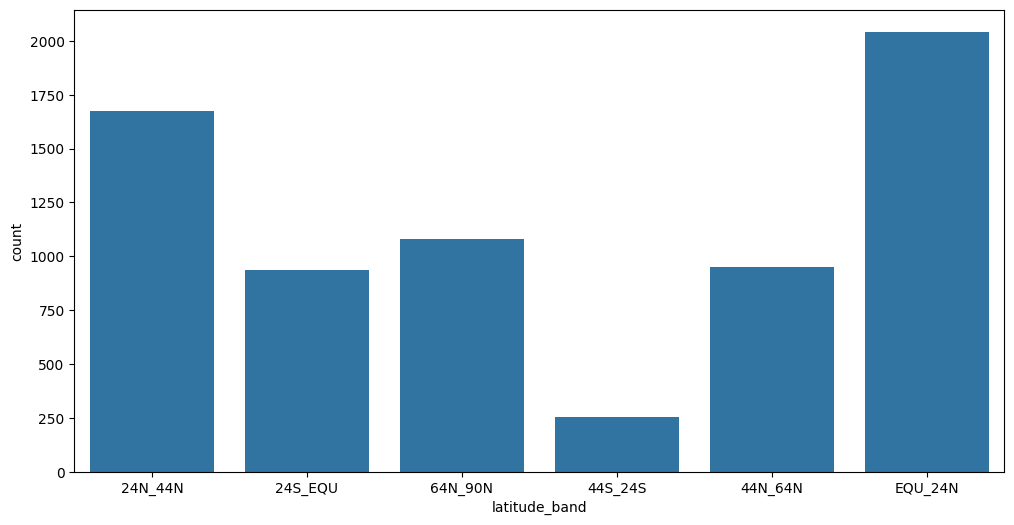

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))

sns.countplot(data=conflict_updated, x="latitude_band")

In [ ]:
## Above plot is wrong as it is also countinng where conflict_present = 0

total_conflict = conflict_updated["conflict_present"].sum()
total_conflict  


np.int64(1481)

In [ ]:
conflict_by_lat = (
    conflict_updated.groupby("latitude_band").sum().reset_index(names="conflict_count")
)

In [ ]:
#conflict_by_lat.drop(columns="country", inplace=True)

In [ ]:
conflict_by_lat

,conflict_count,country,year,conflict_present,deaths,latitude
0,24N_44N,afghanistanafghanistanafghanistanafghanistanaf...,3363489,491,956518,59230.667843
1,24S_EQU,angolaangolaangolaangolaangolaangolaangolaango...,1876095,171,79112,-10743.980377
2,44N_64N,austriaaustriaaustriaaustriaaustriaaustriaaust...,1902563,42,245917,48277.464161
3,44S_24S,argentinaargentinaargentinaargentinaargentinaa...,505638,4,440,-8349.686676
4,64N_90N,antigua & barbudaantigua & barbudaantigua & ba...,2171318,183,218831,7551.373500
5,EQU_24N,bangladeshbangladeshbangladeshbangladeshbangla...,4099421,590,872322,23889.896297


In [ ]:
lat_order = [
    "44S_24S",   # Southern mid-latitudes
    "24S_EQU",   # Southern tropics
    "EQU_24N",   # Northern tropics
    "24N_44N",   # Northern mid-latitudes
    "44N_64N",   # Subpolar
    "64N_90N"    # Polar
]


<Axes: xlabel='conflict_count', ylabel='conflict_present'>

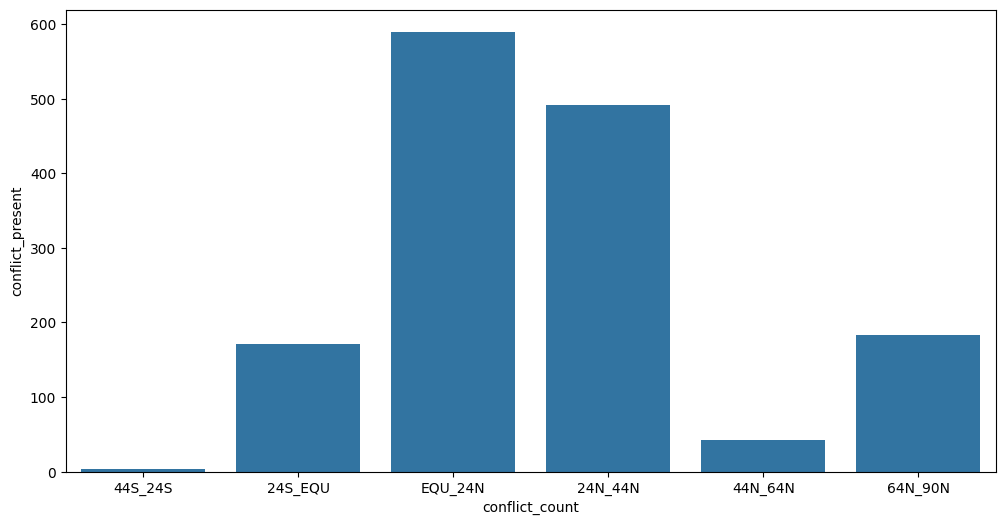

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=conflict_by_lat, x="conflict_count", y="conflict_present", order=lat_order, )

## NOW MERGING TEMPERATURE AND CONFLICT DATA
